# Выбор локации для скважины

#### Описание исследования  
Целью исследования является построение модели для нефтедобывающей компании «ГлавРосГосНефть», 
которые будут применяться вычисления региона для добычи нефти, где деятельность компании принесёт наибольшую прибыль.  
   


Для проведения исследования были предоставлены три таблицы данных геологоразведки трёх регионов со следующими признаками:   
    - идентификатор скважины 
    - f0, f1, f2 — три признака точек добычи  
    - объём запасов в скважине
      
    
В работе необходимо произвести следующие действия:  
    
Задача 1  
1) Изучение общей информации:  
    - Изученеие файлов с данными, получение общей информации из файлов geo_data_0.csv, geo_data_1.csv, geo_data_2.csv      
2) Обучение и проверка модели для каждого региона:    
    - деление данных на обучающую и валидационную    
    - обучение модели линейной регрессии, составление предсказания на валидационной выборке    
    - вычисление среднего запаса предсказанного сырья и RMSE модели    
3) Рассчёт прибыли:    
    - рассчёт достаточного объёма сырья для безубыточной разработки новой скважины
4) Создание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели:  
    - выбор 200 скважин с максимальными значениями предсказаний объёмов сырья   
    - суммирование целевых значений объёма сырья  
    - рассчёт прибыли для полученного объёма сырья
5) Рассчёт рисков и прибыли для каждого региона:    
    - нахождение прибыли с помощью Bootstrap
    - вычисление средней прибыли, 95%-й доверительного интервала и риска убытков  
    - формирование предложения для разработки скважины       
6) Оформление выводов.  
  

## Загрузка и подготовка данных

In [1]:
#импорт библиотек
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from numpy.random import RandomState
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

RANDOM_STATE = 42
np.random.seed(0)
!pip install scikit-learn --upgrade

In [2]:
#импорт файлов
pd.set_option('display.max_columns', 50) 
pth1_1 = '/datasets/geo_data_0.csv'
pth2_1 = 'geo_data_0.csv'

pth1_2 = '/datasets/geo_data_1.csv'
pth2_2 = 'geo_data_1.csv'

pth1_3 = '/datasets/geo_data_2.csv'
pth2_3 = 'geo_data_2.csv'


if os.path.exists(pth1_1):
    geo_1 = pd.read_csv(pth1_1, sep=',', decimal=';')
elif os.path.exists(pth2_1):
    geo_1 = pd.read_csv(pth2_1, sep=',', decimal=';')
else:
    print('Something is wrong')
    
if os.path.exists(pth1_2):
    geo_2 = pd.read_csv(pth1_2, sep=',', decimal=';')
elif os.path.exists(pth2_2):
    geo_2 = pd.read_csv(pth2_2, sep=',', decimal=';')
else:
    print('Something is wrong')
    
if os.path.exists(pth1_3):
    geo_3 = pd.read_csv(pth1_3, sep=',', decimal=';')
elif os.path.exists(pth2_3):
    geo_3 = pd.read_csv(pth2_3, sep=',', decimal=';')
else:
    print('Something is wrong') 
    


In [3]:
display(geo_1.head(5), geo_1.info(), sum(geo_1.duplicated()) , len(geo_1['id'].unique()))
display(geo_2.head(5), geo_2.info(), sum(geo_2.duplicated()), len(geo_2['id'].unique()))
display(geo_3.head(5), geo_3.info(), sum(geo_3.duplicated()), len(geo_3['id'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       100000 non-null  object
 1   f0       100000 non-null  object
 2   f1       100000 non-null  object
 3   f2       100000 non-null  object
 4   product  100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.7057449842080644,-0.4978225001976334,1.22116994843607,105.28006184349583
1,2acmU,1.3347112926051892,-0.3401642528583136,4.3650803324282,73.03775026515737
2,409Wp,1.0227322634721168,0.15199044457022945,1.4199262386740652,85.26564713099945
3,iJLyR,-0.03217162450743976,0.13903270818447744,2.9785659663204838,168.62077555509563
4,Xdl7t,1.988431059439699,0.15541267777667178,4.751769119262962,154.03664673738086


None

0

99990

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       100000 non-null  object
 1   f0       100000 non-null  object
 2   f1       100000 non-null  object
 3   f2       100000 non-null  object
 4   product  100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.00134818249185,-8.275999947188001,-0.005876013693320655,3.179102583207246
1,62mP7,14.272087811011147,-3.47508321506002,0.9991827365665829,26.95326103153969
2,vyE1P,6.263187352448809,-5.948385788285711,5.001160160764809,134.76630515769844
3,KcrkZ,-13.081196289023516,-11.506056864519605,4.999414898074921,137.94540774090564
4,AHL4O,12.702194885533585,-8.147433374146587,5.00436255224226,134.76630515769844


None

0

99996

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       100000 non-null  object
 1   f0       100000 non-null  object
 2   f1       100000 non-null  object
 3   f2       100000 non-null  object
 4   product  100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.1469870984179529,0.9633279217162892,-0.8289649221710994,27.758673230730036
1,WJtFt,0.2627779016539684,0.2698389572803021,-2.530186515492004,56.06969663239464
2,ovLUW,0.19458728165865746,0.2890350017576741,-5.586432770903118,62.87191004763475
3,q6cA6,2.2360596126935817,-0.5537598999099264,0.930037615920042,114.57284166750858
4,WPMUX,-0.5159928644136754,1.7162655596688288,5.899011469346728,149.60074591275887


None

0

99996

Данные соответствуют описанию.    
Необходимо заменить типы данных на float.    
Дубликаты обнаружены не были.    
Пропуски не были обнаружены.   
Заявим столбец  id в качестве индекса.    
В столбце id были вычеслено количество уникальных значений.    
Выявлено, что уникальных значений в таблице geo_1 - 99990, geo_2 - 999996, geo_3 - 99996.    
Повторяющиеся значения удалять не будем, каждый случай считаем уникальным и ценным для обучения модели.  

In [4]:

geo_1=geo_1.set_index('id')
geo_2=geo_2.set_index('id')
geo_3=geo_3.set_index('id')

In [5]:
geo_1['f0'] = geo_1['f0'].astype(float)
geo_1['f1'] = geo_1['f1'].astype(float)
geo_1['f2'] = geo_1['f2'].astype(float)
geo_1['product'] = geo_1['product'].astype(float)

geo_2['f0'] = geo_2['f0'].astype(float)
geo_2['f1'] = geo_2['f1'].astype(float)
geo_2['f2'] = geo_2['f2'].astype(float)
geo_2['product'] = geo_2['product'].astype(float)

geo_3['f0'] = geo_3['f0'].astype(float)
geo_3['f1'] = geo_3['f1'].astype(float)
geo_3['f2'] = geo_3['f2'].astype(float)
geo_3['product'] = geo_3['product'].astype(float)

In [6]:
display(geo_1.info(), geo_2.info(), geo_3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1  

None

None

None

In [7]:
#распределение количественных данных

def show_hists(data, data_label, num_bins, log_scale=False):
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label + ". Распределение", fontsize=18)
    axes[0].set_ylabel('Количество записей', fontsize=15)
    sns.histplot(data, bins=num_bins, ax=axes[0])
    axes[1].set_title(data_label + ". Boxplot", fontsize=18)
    sns.boxplot(data, x=data_label, ax=axes[1])
    plt.figure(figsize=(16,4))
    ax = plt.subplot(121)
    st.probplot(data, dist="norm", plot=plt)
    ax.set_title("Q-Q Prob Plot. " + data_label )
    plt.show()

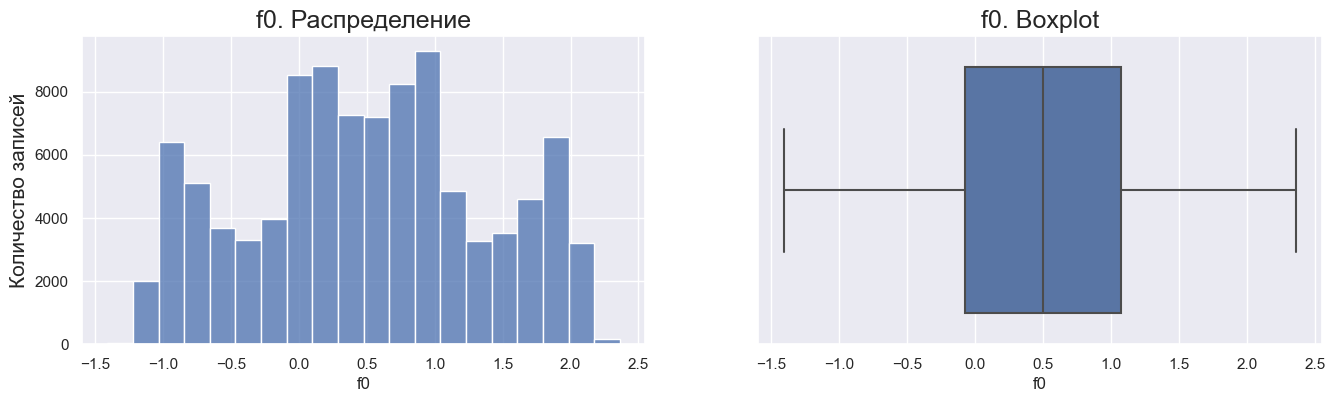

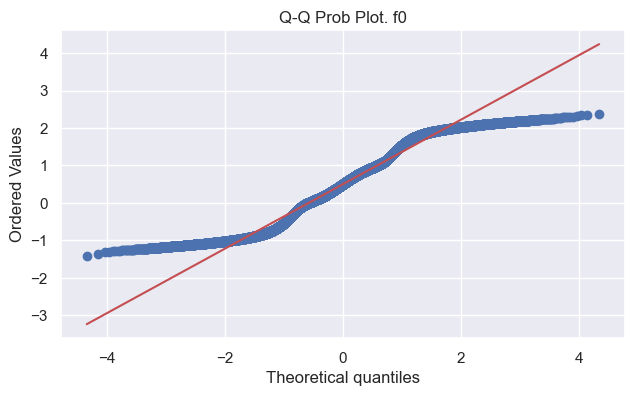

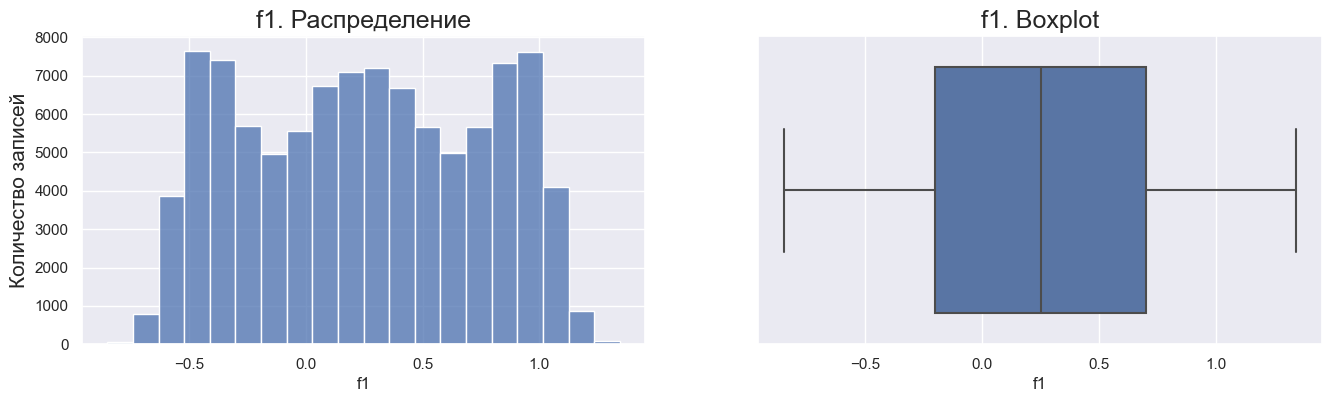

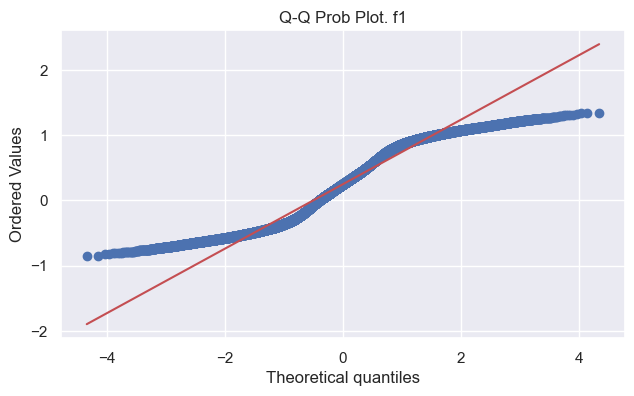

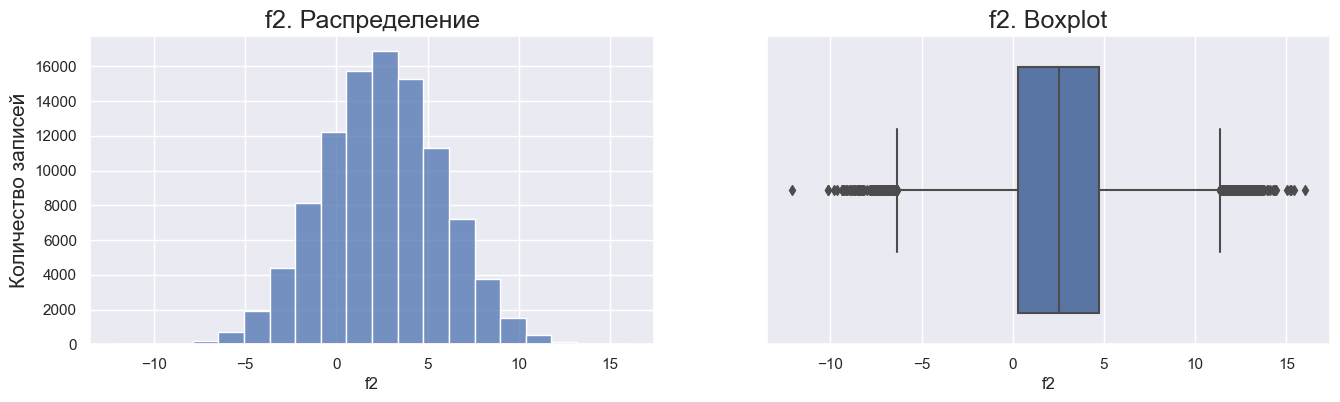

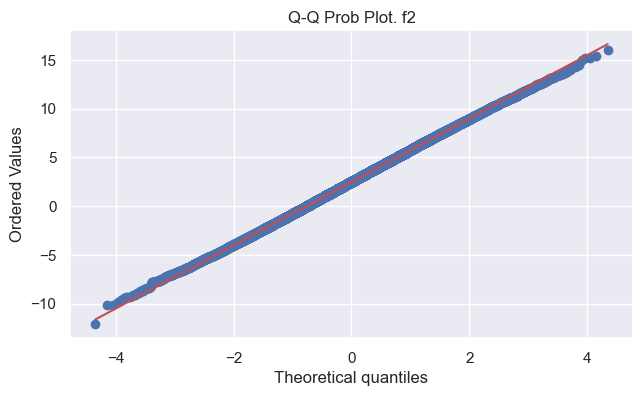

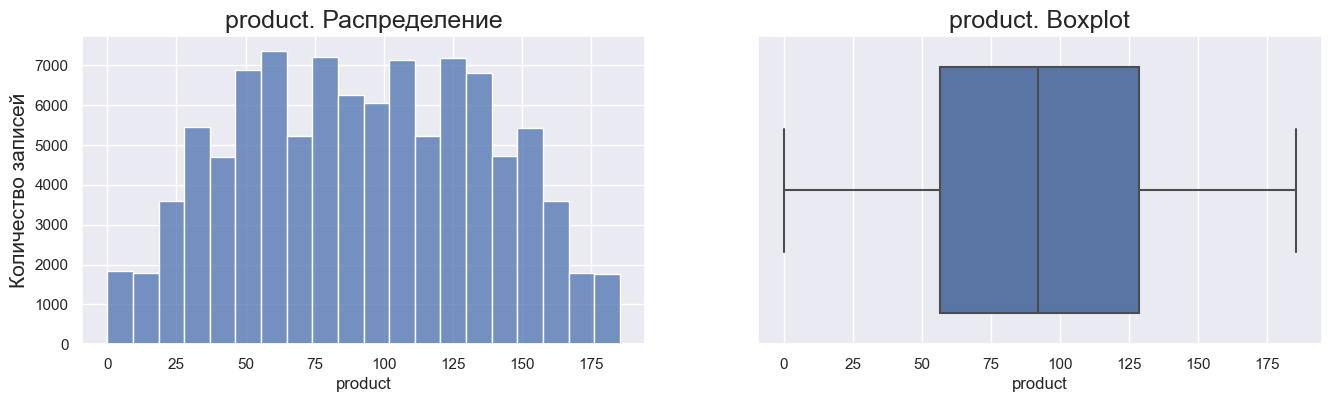

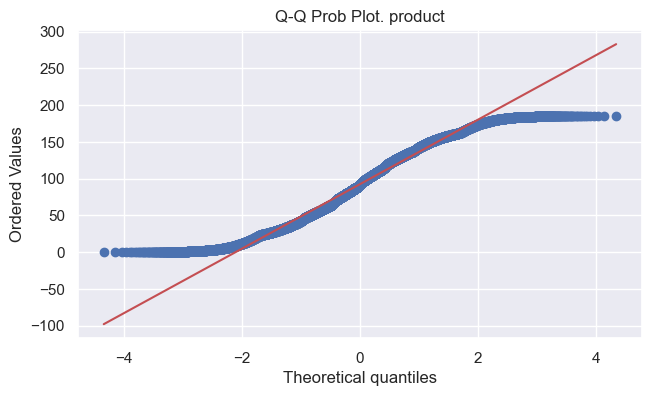

In [8]:
num_col = ['f0',
           'f1',
           'f2', 
           'product'
           ]
for column in num_col:
    show_hists(geo_1[column], column, num_bins=20)

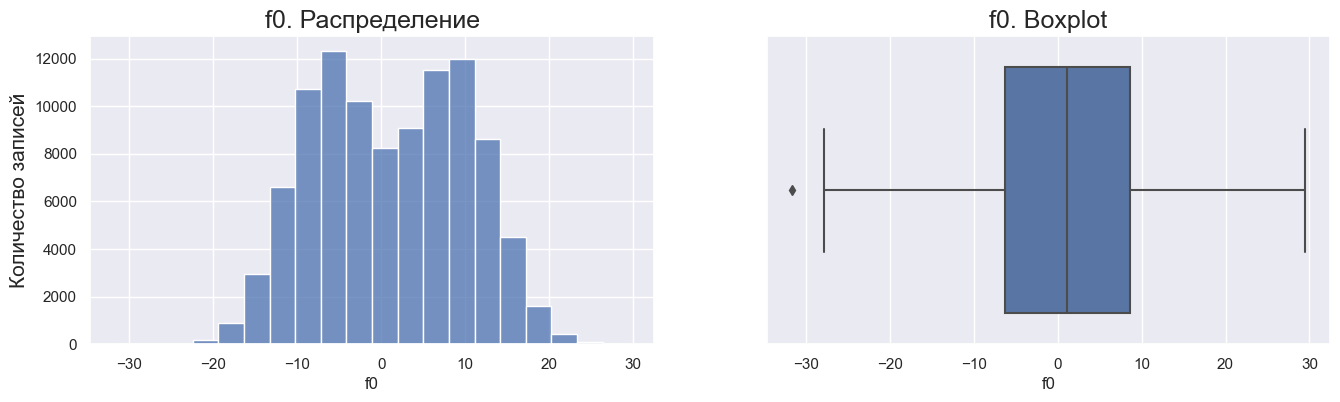

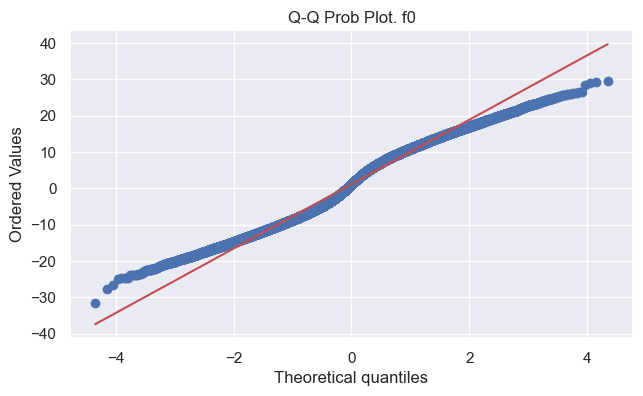

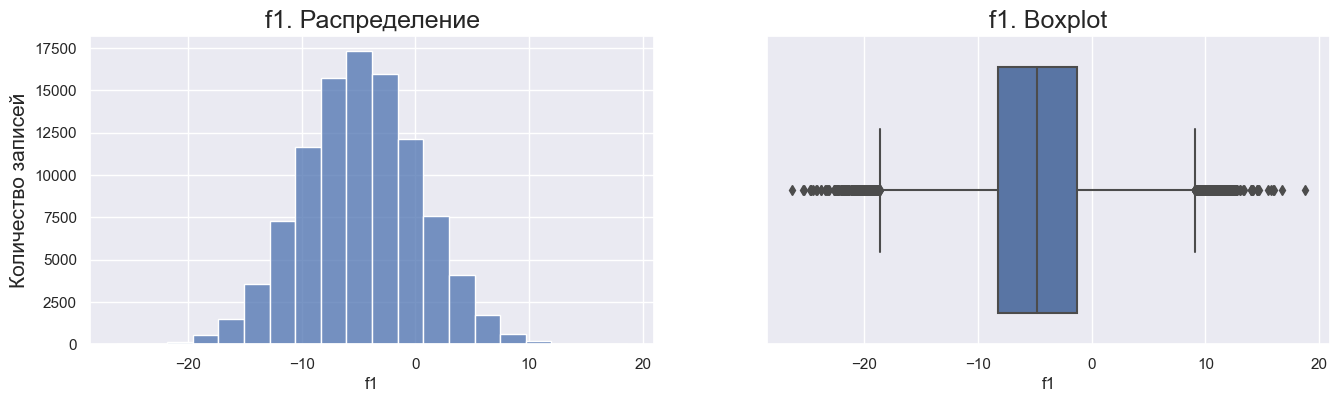

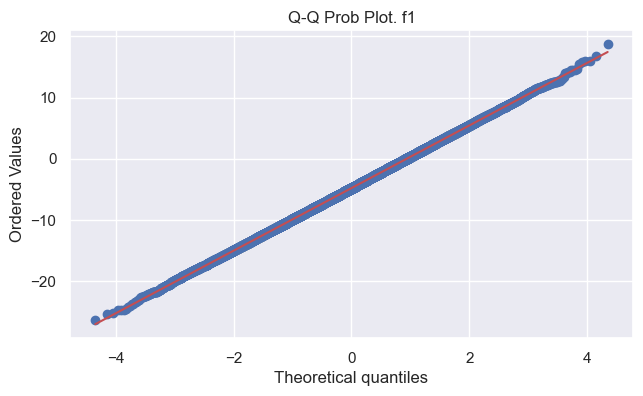

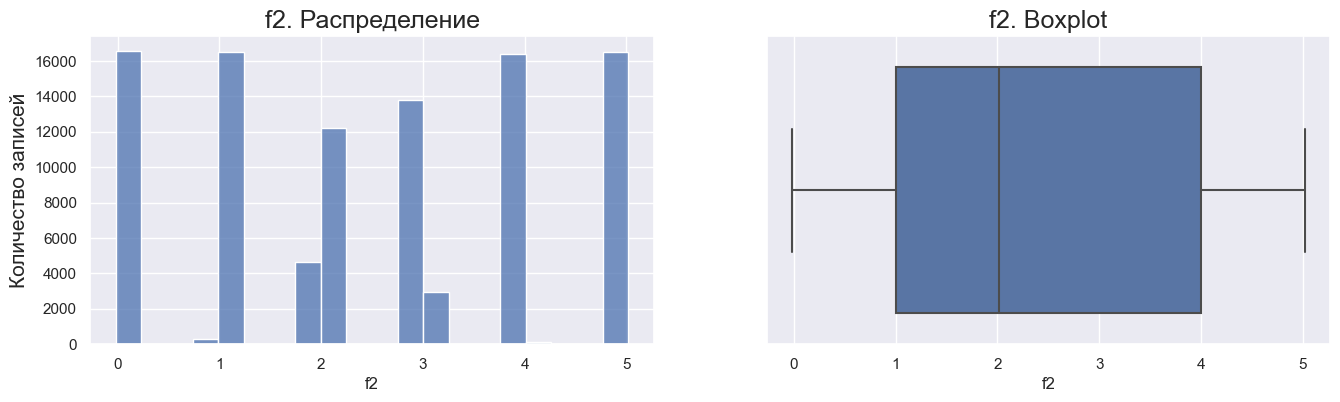

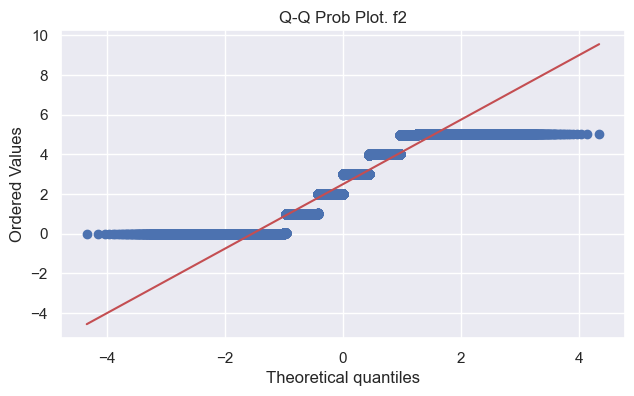

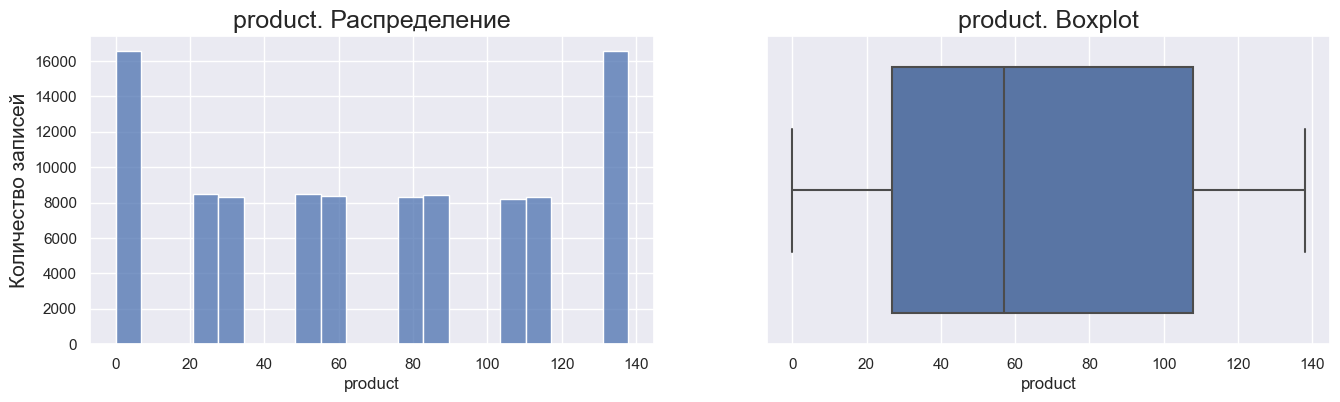

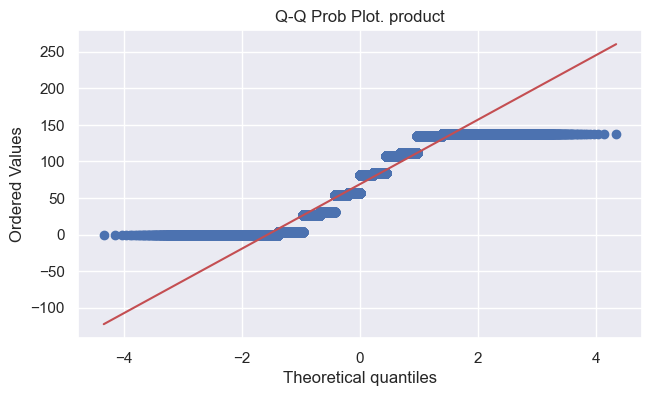

In [9]:
for column in num_col:
    show_hists(geo_2[column], column, num_bins=20)

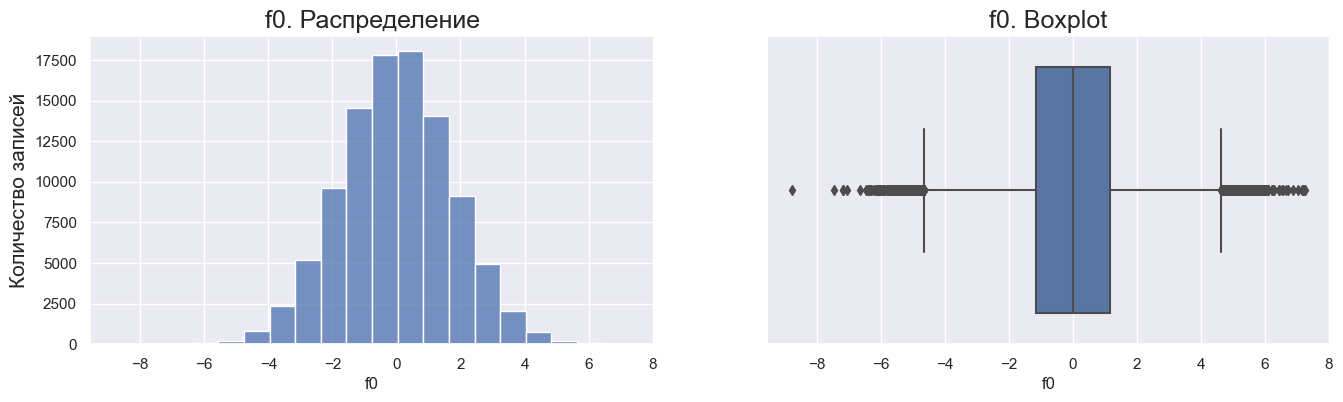

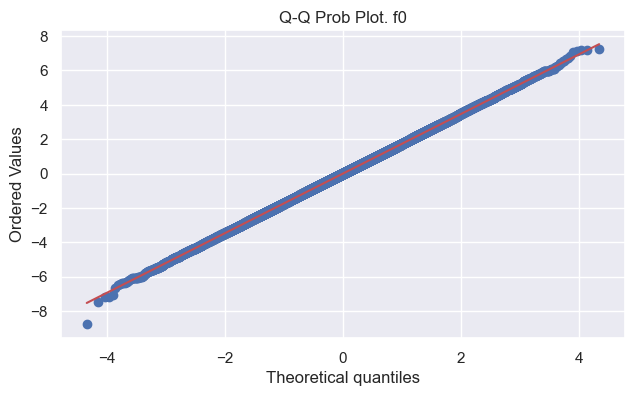

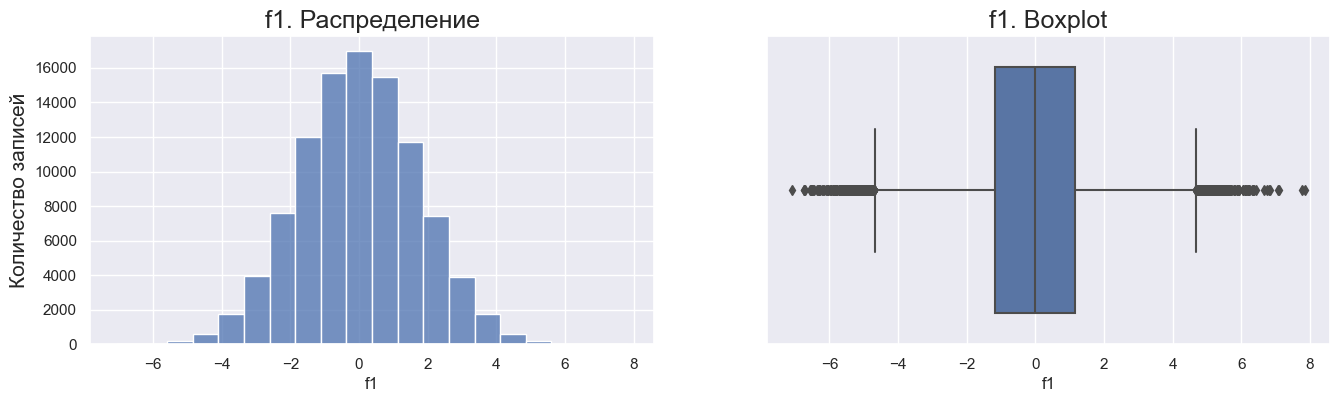

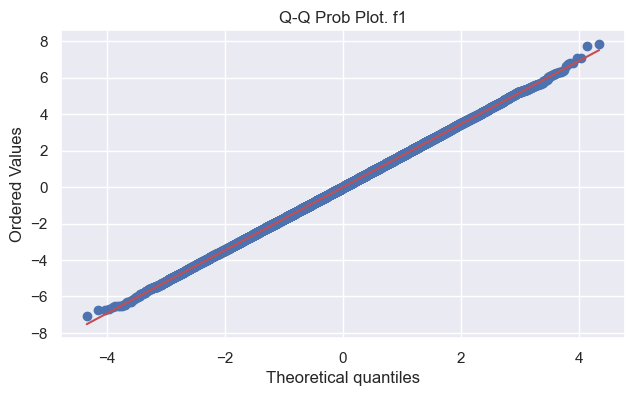

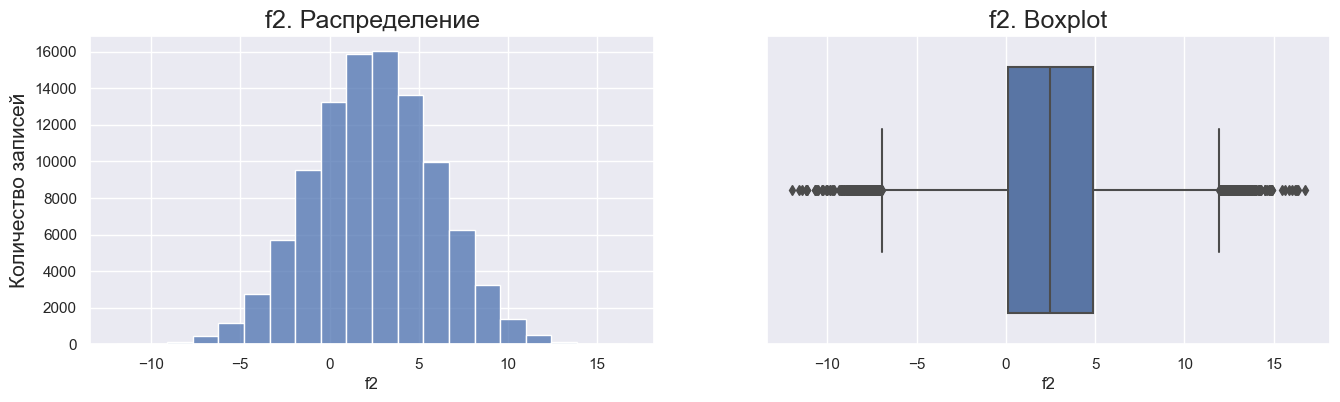

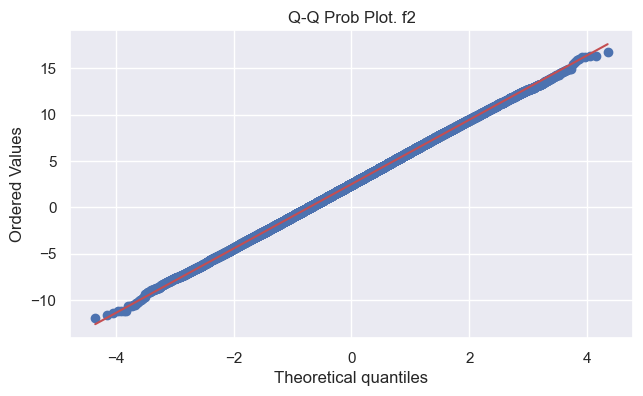

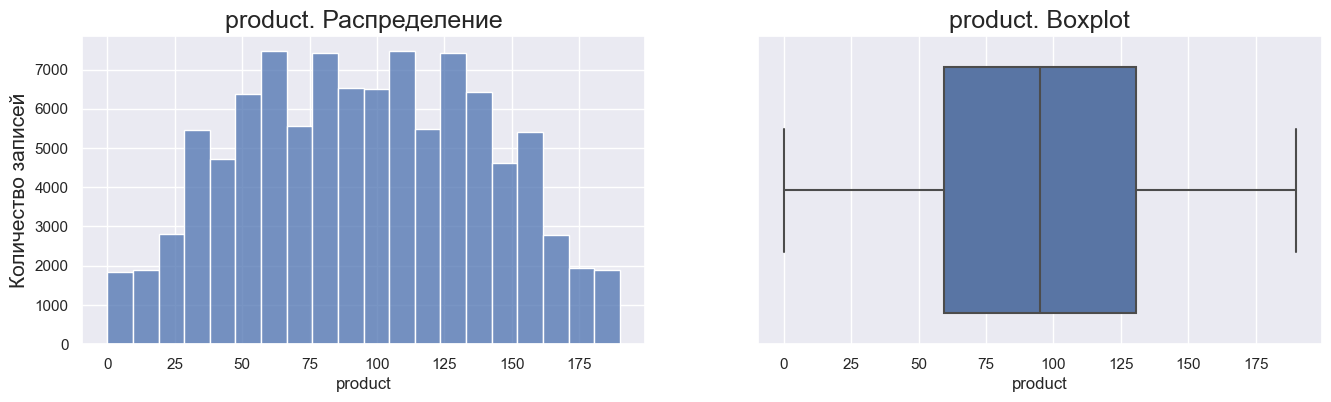

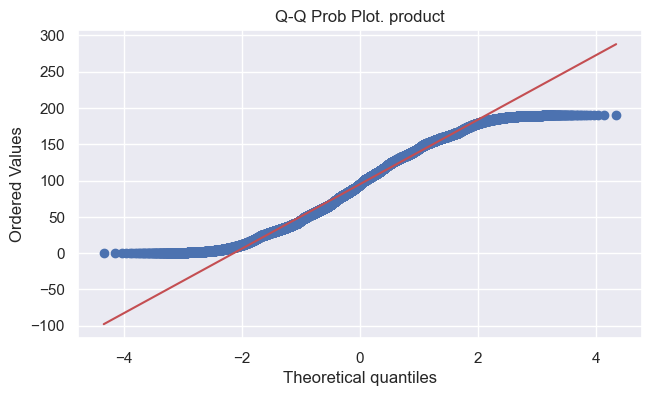

In [10]:
for column in num_col:
    show_hists(geo_3[column], column, num_bins=20)

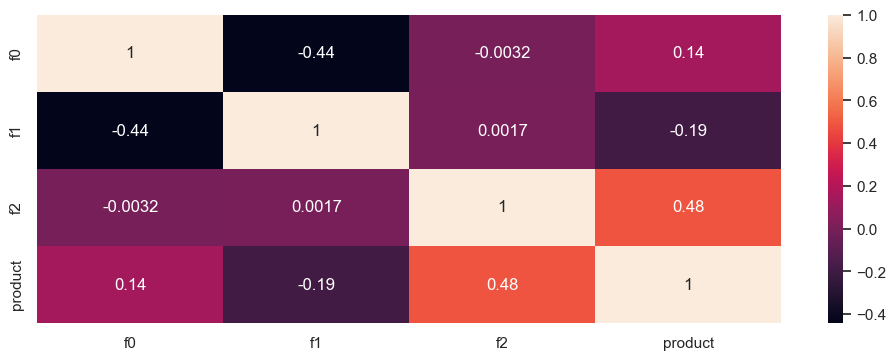

In [11]:
plt.figure(figsize=(12, 4))
sns.heatmap(geo_1.corr(), annot = True)
plt.show()

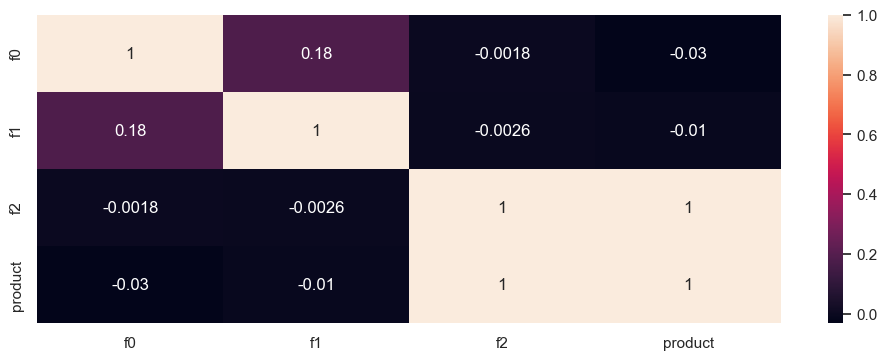

In [12]:
plt.figure(figsize=(12, 4))
sns.heatmap(geo_2.corr(), annot = True)
plt.show()

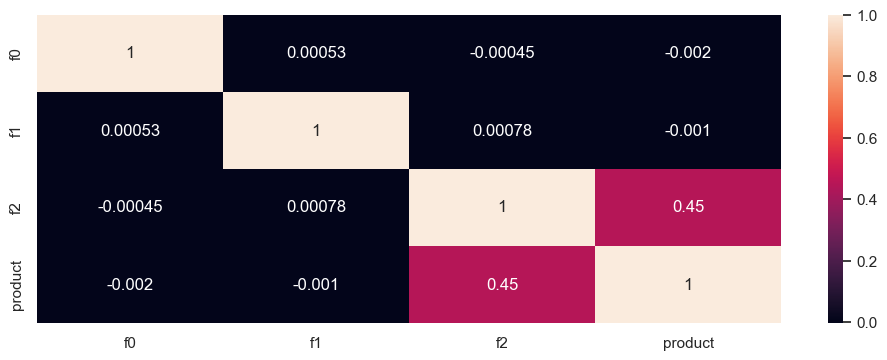

In [13]:
plt.figure(figsize=(12, 4))
sns.heatmap(geo_3.corr(), annot = True)
plt.show()

Были построены распределения значений в таблицах по регионам.     
Нормальной распределение имеют следующие параметры:    
    Регион 1: f2    
    Регион 2: f1   
    Регион 3: f0, f1, f2    
Остальные параметры в таблицах имеют не нормальное распределение.  
Также у параметром f0, f1, f2 наблюдаются выбросы по графику boxplot.   
Так как нам неизвестна природа этих параметров, мы не можем оценить, насколько адекватно наличие подобных выбросов.       
При рассмотрении таблицы корреляции видим, что:  
    Регион 1: с целевым признаком коррелирует признак f2 (0.48), у признаков f1 и f0 обратная корреляция (-0.44)     
    Регион 2: признак f2 коллинеарен целевому признаку     
    Регион 3: признак f2 коррелирует с целевым признаком (0.45)  


## Обучение и проверка модели

Создадим функцию, в которой будут производится следующие действия:  
    1) Принятие на вход рассматриваемого датасета  
    2) Выявление целевого и выходных признаков      
    3) Деление выборки на валидационную и тренировочную  в соотношении 75:25   
    4) Обучение модели линейной регрессии  
    5) Выдача результата с предсказаниями среднего запаса сырья и метрики RMSE  
    

In [14]:
def prediction(data):
 
    features = data.drop("product", axis=1)
    target = data["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=12345)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    predictions = pd.Series(predictions)
    rmse = (mean_squared_error(predictions, target_valid))**(0.5)
    mean_product = predictions.mean()
    
    print("RMSE: {0:.2f}".format(rmse))
    print("Средний запас сырья: {0:.2f}".format(mean_product))
    
    return (predictions, target_valid.reset_index(drop=True), rmse)

In [15]:
pred_1, trgt_1, rmse_1 = prediction(geo_1)
pred_2, trgt_2, rmse_2 = prediction(geo_2)
pred_3, trgt_3, rmse_3 = prediction(geo_3)

RMSE: 37.58
Средний запас сырья: 92.59
RMSE: 0.89
Средний запас сырья: 68.73
RMSE: 40.03
Средний запас сырья: 94.97


При оценке работы модели и полученных с её помощью предсказанных значений средних запасов сырья помним, 
что чем ближе метрика RMSE к нулю, тем точнее предсказание она делает.  
Рассматрвиая результаты работы модели, видим, что:  
    1) В регионах 1 и 3 были предсказаны самые высокие показатели запасов сырья - 92.6 и 95 тыс. баррелей соответственно. 
    Однако метрики RMSE также высоки, что отражает неоднозначность предсказания, неточность модели  
    2) В регионе 2 был предсказан запас сырья в 68.7  тыс. баррелей, при близкой к нулю метрике RMSE (0.89), что отражает точность работы модели  


## Подготовка к расчёту прибыли

In [16]:
#constants
k = 200
budget = 10**10
revenue = 45*(10**4)
STATE = np.random.RandomState(12345)

In [17]:
volume = budget/ k /revenue
print('Минимальный объём продукта с одной скважины для безубыточной разработки:', round(volume,2))

Минимальный объём продукта с одной скважины для безубыточной разработки: 111.11


Достаточный объём продукта для безубыточной разработки составляет 111.11 тыс. баррелей.    
Данный показатель был рассчитан для 200 лучших скважин из выборки в 500 скважин.    
Замечаем, что предсказанный средний объём скважен в рассматриваемых регионах меньше, чем достаточный объём для безубыточного производства.  


## Расчёт прибыли и рисков 

Создадим функцию для рассчёта прибыли по выборке в 200 максимальных значений объёма сырья из предсказанных.  


In [18]:
def profit_pred(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    probs_sorted_count = probs_sorted[:count]
    selected = target[probs_sorted.index][:count]
    print("Прибыль для полученного объёма сырья:", round(round(revenue * probs_sorted_count.sum() - budget, 2)/10**6, 2), 'млн.руб')
    print("Суммарный целевой объём сырья: ", round(probs_sorted_count.sum(),2), 'тыс. баррелей')
    print("Средний запас сырья среди скважин с максимальным показателем:", round(probs_sorted_count.mean(),2), 'тыс. баррелей')


In [19]:
profit_pred(trgt_1, pred_1, k)

Прибыль для полученного объёма сырья: 3996.05 млн.руб
Суммарный целевой объём сырья:  31102.33 тыс. баррелей
Средний запас сырья среди скважин с максимальным показателем: 155.51 тыс. баррелей


In [20]:
profit_pred(trgt_2, pred_2, k)

Прибыль для полученного объёма сырья: 2485.71 млн.руб
Суммарный целевой объём сырья:  27746.03 тыс. баррелей
Средний запас сырья среди скважин с максимальным показателем: 138.73 тыс. баррелей


In [21]:
profit_pred(trgt_3, pred_3, k)

Прибыль для полученного объёма сырья: 3321.75 млн.руб
Суммарный целевой объём сырья:  29603.9 тыс. баррелей
Средний запас сырья среди скважин с максимальным показателем: 148.02 тыс. баррелей


При подсчёте прибыли от 200 лучших скважин по предсказанным значениям выяснили, что:  
    - все 200 скважин преодолевают порог добычи в 111.11 тыс баррелей для безубыточного производства, больше всего у первого региона (155.5 тыс. баррелей)  
    - в первом регионе самы большой суммарный целевой объём сырья 31102.33 тыс. баррелей  
    - прибыль с полученного объёма сырья самая большая у первого региона: 3996.05 млн.руб
    
    

In [22]:
def profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return revenue * selected.sum() - budget

Создадим функцию для рассчёта средней выручки, 95% доверительного интервала и просчёта рисков убытков.

In [24]:
def risk_calc(trgt, pred):
    values = []
    wells = []
    for j in range(1000):
        target_subsample = trgt.sample(n = 500, replace = True, random_state = STATE)
        probs_subsample = pred.loc[target_subsample.index]

        values.append(profit(target_subsample, probs_subsample, k))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = values[values < 0].count()/values.count()*100
    mean = values.mean()
    
    print("Средняя прибыль:", round(mean/10**6, 2), 'млн.руб')
    print("Доверительный интервал:", round(lower/10**6, 2),'млн.руб.', '-', round(upper/10**6, 2),'млн.руб')
    print("Риск:", round(risk, 2), '%')
 

In [25]:
risk_calc(trgt_1, pred_1)

Средняя прибыль: 425.94 млн.руб
Доверительный интервал: -102.09 млн.руб. - 947.98 млн.руб
Риск: 6.0 %


In [26]:
risk_calc(trgt_2, pred_2)

Средняя прибыль: 518.26 млн.руб
Доверительный интервал: 128.12 млн.руб. - 953.61 млн.руб
Риск: 0.3 %


In [27]:
risk_calc(trgt_3, pred_3)

Средняя прибыль: 420.19 млн.руб
Доверительный интервал: -115.85 млн.руб. - 989.63 млн.руб
Риск: 6.2 %


На данном этапе были составлены функции для расчёта прибыли от добычи на скважинах в трёх регионах и для просчёта риска убытков.  
Было выявлены следующие наблюдения:  
- второй регион принесёт нибольшую среднюю выручку  
- второй регион имеет самый низкий риск убытков : ниже 2.5%  
- второй регион имеет самый узкий разброс по доверительному интервалу  
Таким образом при выборе региона для разработке скважин выгоднее всего прорабатываеть вариант второго региона.  

### Вывод   

В данной работе была поставлена задача с помощью модели линейной регрессии проанализировать добычу сырья в трёх регионах с целью выявления региона наиболее выгодного для инвестиций в разработку скважин.  
В ходе работы были произведены следующие действия:  
1) Изучение общей информации:  
Были полученны данные из файлов geo_data_0.csv, geo_data_1.csv, geo_data_2.csv.     
Данные соответствуют описанию в техническом задании.      
Дубликаты и пропуски обнаружены не были. Количество записей в каждой из таблиц: 10000       
Были построены распределения значений в таблицах по регионам.       
Нормальной распределение имеют следующие параметры:    
    Регион 1: f2    
    Регион 2: f1   
    Регион 3: f0, f1, f2    
Остальные параметры в таблицах имеют не нормальное распределение.  
Также у параметром f0, f1, f2 наблюдаются выбросы по графику boxplot.   
Так как нам неизвестна природа этих параметров, мы не можем оценить, насколько адекватно наличие подобных выбросов.       
При рассмотрении таблицы корреляции видим, что:  
    Регион 1: с целевым признаком коррелирует признак f2 (0.48), у признаков f1 и f0 обратная корреляция (-0.44)     
    Регион 2: признак f2 коллинеарен целевому признаку     
    Регион 3: признак f2 коррелирует с целевым признаком (0.45)      
        
2) Обучение и проверка модели для каждого региона:     
При оценке работы модели и полученных с её помощью предсказанных значений средних запасов сырья помним, 
что чем ближе метрика RMSE к нулю, тем точнее предсказание она делает.  
Рассматрвиая результаты работы модели, видим, что:  
    - В регионах 1 и 3 были предсказаны самые высокие показатели запасов сырья - 92.6 и 95 тыс. баррелей соответственно. 
    Однако метрики RMSE также высоки, что отражает неоднозначность предсказания, неточность модели  
    - В регионе 2 был предсказан запас сырья в 68.7  тыс. баррелей, при близкой к нулю метрике RMSE (0.89), что отражает точность работы модели  

3) Рассчёт прибыли:    
Достаточный объём продукта для безубыточной разработки составляет 111.11 тыс. баррелей.    
Данный показатель был рассчитан для 200 лучших скважин из выборки в 500 скважин.    
Замечаем, что предсказанный средний объём сырья со всех скважен в рассматриваемых регионах меньше, чем достаточный объём для безубыточного производства.  
4) Создание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели:  
При подсчёте прибыли от 200 лучших скважин по предсказанным значениям выяснили, что:  
    - все 200 скважин преодолевают порог добычи в 111.11 тыс баррелей для безубыточного производства, больше всего у первого региона (155.5 тыс. баррелей)  
    - в первом регионе самы большой суммарный целевой объём сырья 31102.33 тыс. баррелей  
    - прибыль с полученного объёма сырья самая большая у первого региона: 3996.05 млн.руб
5) Рассчёт рисков и прибыли для каждого региона:    
На данном этапе были составлены функции для расчёта прибыли от добычи на скважинах в трёх регионах и для просчёта риска убытков.  
Было выявлены следующие наблюдения:  
- второй регион принесёт нибольшую среднюю выручку  
- второй регион имеет самый низкий риск убытков : ниже 2.5%  
- второй регион имеет самый узкий разброс по доверительному интервалу  
Таким образом при выборе региона для разработки скважин наименее рискованно и наиболее предсказуемо прорабатываеть вариант второго региона.       
